K-평균 알고리즘을 사용하여 유사한 객체 그룹핑
  - 사이킷런을 사용한 k-평균 군집

In [5]:
# 군집화를 위한 합성 데이터를 생성하는 코드
# 3개의 중심을 갖는 클러스터를  생성, 각 크러스터의 표준편차는 0.5
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=150,n_features=2, centers=3,cluster_std=0.5,shuffle=True,random_state=0)

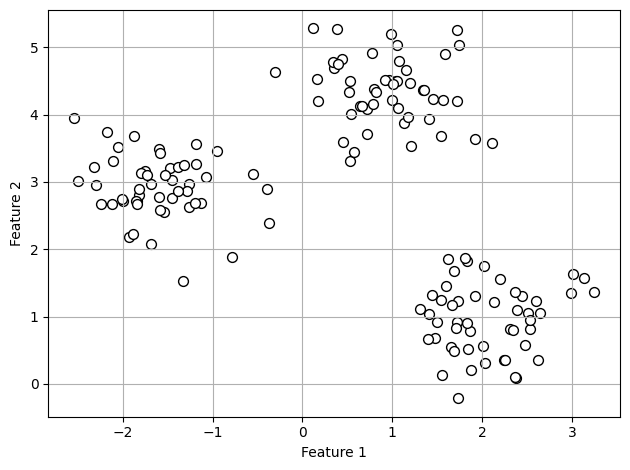

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolor='black',s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.tight_layout()
plt.show()

In [9]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init = 'random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
y_kim = km.fit_predict(X)

In [13]:
y

array([1, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 1, 0, 1,
       0, 0, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 0, 2, 0, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 2,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 0, 0, 1, 1, 1, 2,
       2, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 1, 2, 1, 1, 0, 2, 0, 0, 0,
       2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 1])

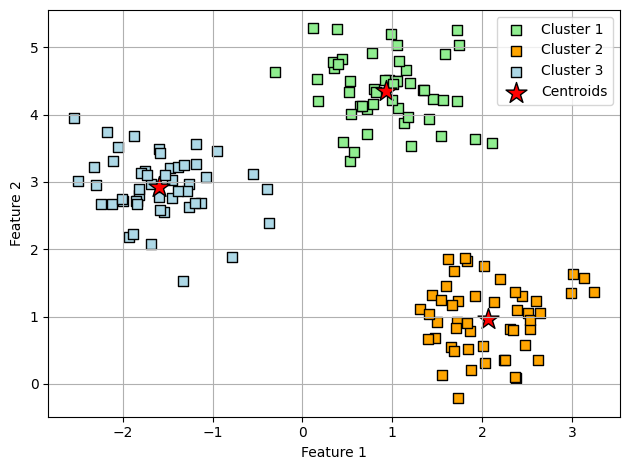

In [14]:
plt.scatter(X[y_kim == 0,0], X[y_kim == 0,1], s=50,c='lightgreen',marker='s',edgecolor='black',label='Cluster 1')
plt.scatter(X[y_kim == 1,0], X[y_kim == 1,1], s=50,c='orange',marker='s',edgecolor='black',label='Cluster 2')
plt.scatter(X[y_kim == 2,0], X[y_kim == 2,1], s=50,c='lightblue',marker='s',edgecolor='black',label='Cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=250,c='red',marker='*',edgecolor='black',label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(scatterpoints=1)
plt.grid()
plt.tight_layout()
plt.show()

In [16]:
print(f'왜곡 : {km.inertia_:.2f}')

왜곡 : 72.48


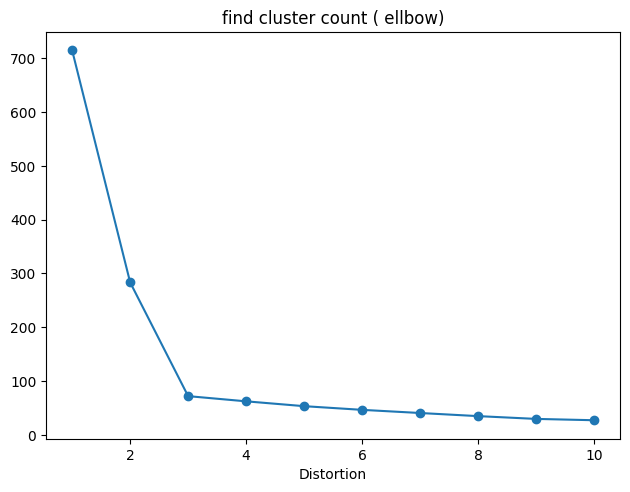

In [18]:
distortions = []
for i in range(1,11):
  km = KMeans(n_clusters=i, init='k-means++',n_init=10,max_iter=300,random_state=0)
  km.fit(X)
  distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.xlabel('Distortion')
plt.tight_layout()
plt.title('find cluster count ( ellbow)')
plt.show()


실루엣 그래프로 군집 품질을 정량화

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


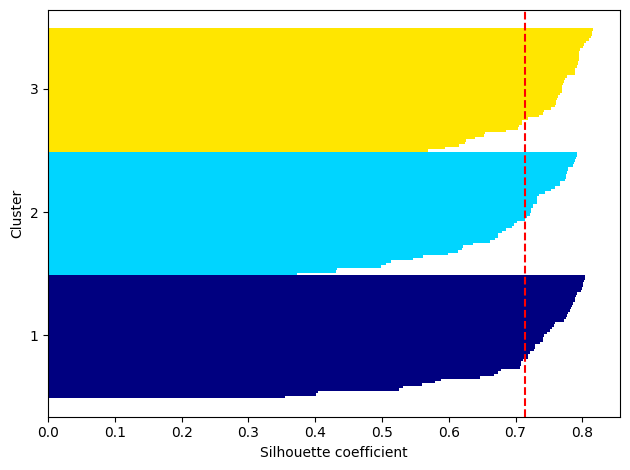

In [24]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=3)
y_km = km.fit_predict(X)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X,y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0,0
yticks = []
for i, c in enumerate(cluster_labels):
  c_silhouette_vals = silhouette_vals[y_km==c]
  c_silhouette_vals.sort()
  y_ax_upper += len(c_silhouette_vals)
  color = cm.jet(float(i) / n_clusters)
  plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals,height=1.0,edgecolor='none', color=color  )
  yticks.append((y_ax_lower + y_ax_upper) / 2.)
  y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg,color='red',linestyle='--')

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

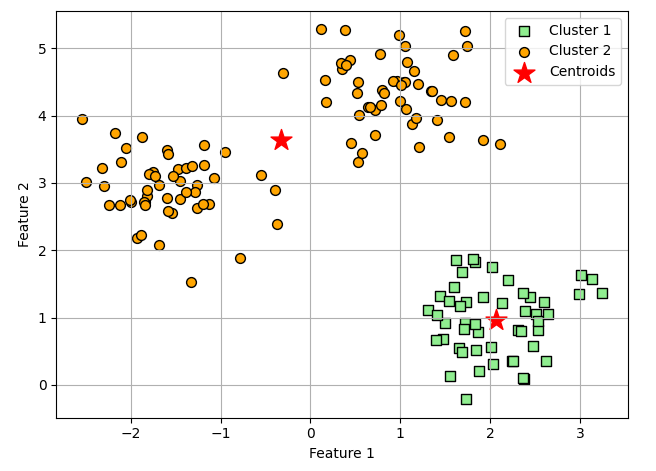

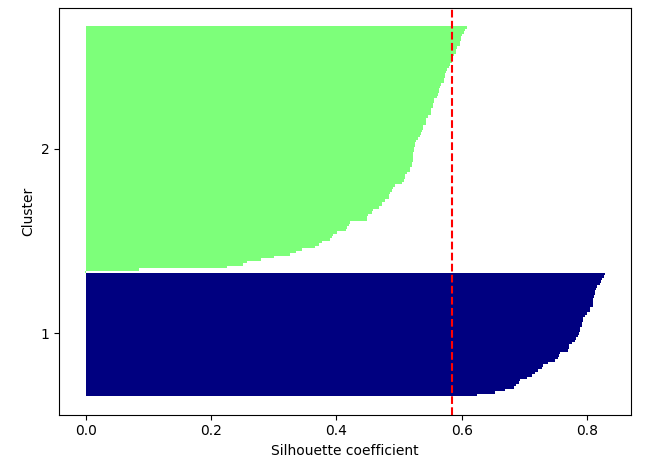

계층적인 트리로 클러스터 조직화
  - 상향식으로 클러스터 묶기

In [ ]:
from IPython.display import Image

In [32]:

import numpy as np
import pandas as pd
np.random.seed(123)
variables = ['X','Y','Z']
labels = ['ID_0','ID_1','ID_2','ID_3','ID_4']
X=np.random.random_sample([5,3])*10
df = pd.DataFrame(X,columns=variables,index=labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


거리행렬 에서 계층군집 수행

In [33]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(df,metric='euclidean')),columns=labels, index=labels  )
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


축약된 거리 행렬

In [34]:
from scipy.cluster.hierarchy import linkage
row_clusters = linkage(pdist(df,metric='euclidean'),method='complete')
pd.DataFrame(row_clusters,
             columns=['row label 1','row label 2', 'distance', 'no. of items in clust'],
             index = [f'cluster {i+1}' for i in range(row_clusters.shape[0])]
             )

,row label 1,row label 2,distance,no. of items in clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


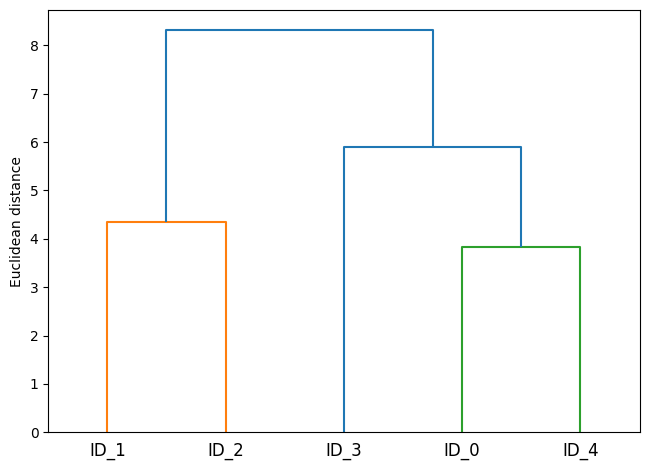

In [35]:
from scipy.cluster.hierarchy import dendrogram
row_dendr = dendrogram(row_clusters,
                       labels = labels
                       )
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()